In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

```math
H(s) = \frac{s^2 + \omega_0^2}{s^2 + \frac{\omega_0}{Q}s + \omega_0^2}
```

```math
s = \frac{2}{T} \frac{1 - z^{-1}}{1 + z^{-1}}
```

In [6]:
# Parameter
sample_rate = 48000  # Sampling-Frequenz in Hz
cutoff_freq = 500   # Grenzfrequenz für den Hochpass in Hz (z. B. oberhalb der Störfrequenzen)
numtaps = 43       # Anzahl der Filterkoeffizienten (ungerade Zahl, höhere Werte -> steilere Übergänge)

# Berechnung der FIR-Koeffizienten
# firwin erzeugt Hochpass-Filter-Koeffizienten mit pass_zero=False
coefficients = firwin(numtaps, cutoff=cutoff_freq, fs=sample_rate, pass_zero=False, window=('kaiser', 0.1))

# Frequenzgang des Filters
w, h = freqz(coefficients, worN=8000, fs=sample_rate)

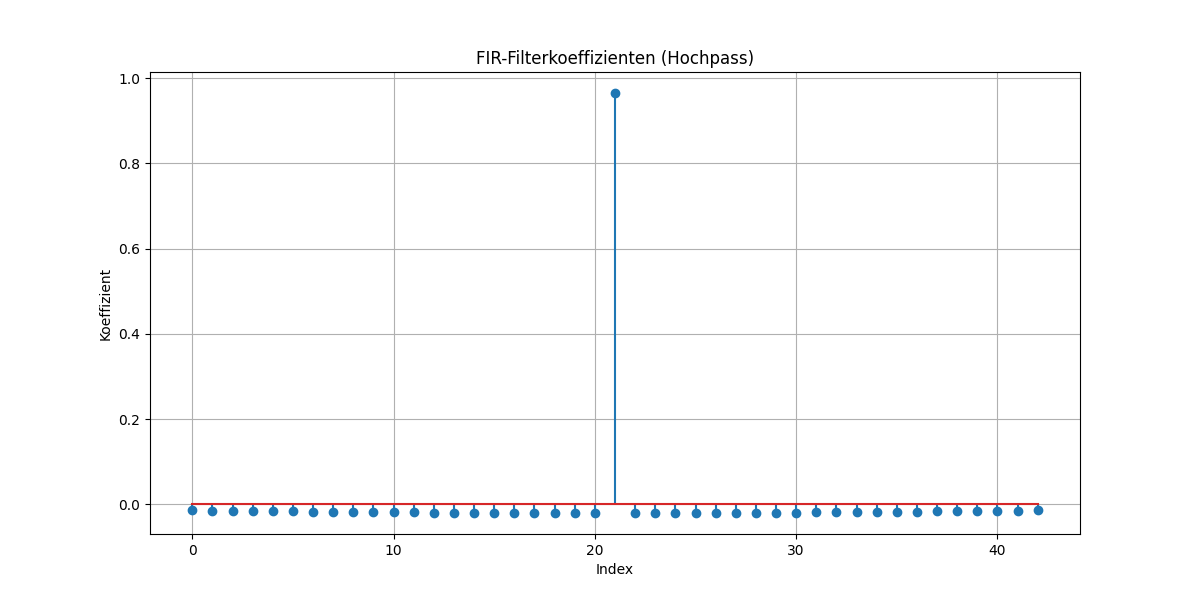

In [11]:
# Ergebnisse plotten
plt.figure(figsize=(12, 6))

# Plot der FIR-Koeffizienten
plt.plot()
plt.stem(coefficients)
plt.title("FIR-Filterkoeffizienten (Hochpass)")
plt.xlabel("Index")
plt.ylabel("Koeffizient")
plt.grid()

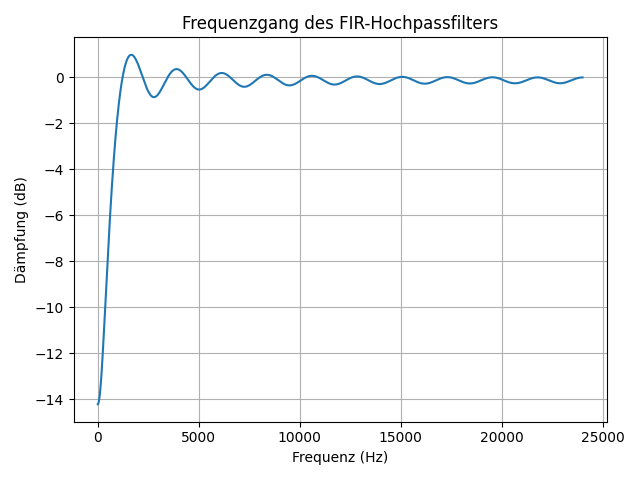

In [12]:
# Plot des Frequenzgangs
plt.figure()
plt.plot()
plt.plot(w, 20 * np.log10(abs(h)))
plt.title("Frequenzgang des FIR-Hochpassfilters")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Dämpfung (dB)")
plt.grid()
plt.tight_layout()

In [13]:
# Export der Filterkoeffizienten in eine Textdatei
with open("fir_coefficients.txt", "w") as file:
    for coeff in coefficients:
        file.write(f"{coeff}\n")

print("FIR-Filterkoeffizienten wurden berechnet und in 'fir_coefficients.txt' gespeichert.")

FIR-Filterkoeffizienten wurden berechnet und in 'fir_coefficients.txt' gespeichert.


### Übertragungsfunktion

```math
H(z) = b_0 + b_1 z^{-1} + b_2 z^{-2} + \dots + b_n z^{-n}
```

```math
H(z) = \mathbf{b}^T \cdot \mathbf{z}
```

```math
\mathbf{b} = 
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots \\
b_n
\end{bmatrix}, \quad
\mathbf{z} = 
\begin{bmatrix}
1 \\
z^{-1} \\
z^{-2} \\
\vdots \\
z^{-n}
\end{bmatrix}
```

```math
H(z) = 
\begin{bmatrix}
b_0 & b_1 & b_2 & \cdots & b_n
\end{bmatrix}
\begin{bmatrix}
1 \\ 
z^{-1} \\ 
z^{-2} \\ 
\vdots \\ 
z^{-n}
\end{bmatrix}
```

```math
H(z) = 
\begin{bmatrix}
-0.0146 & -0.0151 & -0.0156 & \cdots & -0.01461
\end{bmatrix}
\begin{bmatrix}
1 \\ 
z^{-1} \\ 
z^{-2} \\ 
\vdots \\ 
z^{-n}
\end{bmatrix}
```

```math
H(z) = -0.0146 + -0.015 z^{-1} + -0.0156 z^{-2} + \dots + -0.01461 z^{-n}
```